In [1]:
!pip install kaggle
!pip install nltk
!pip install tensorflow
!pip install scikit-learn


In [2]:
from google.colab import files
files.upload()  # kaggle.json dosyasını yükle


Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"damlakorkmaz64","key":"7cb7166b6fb3d0cb6a13e5ab321a0190"}'}

In [3]:
import os
import zipfile

# Kaggle API key dosyasını taşıyoruz
!mkdir -p ~/.kaggle
!cp kaggle(2).json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle(2).json

# Veri setini indiriyoruz
!kaggle datasets download -d cebeci/turkishreviews


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [4]:
!ls


'kaggle (2).json'   sample_data


In [5]:
import os
import zipfile

# Kaggle API key dosyasını taşıyoruz
!mkdir -p ~/.kaggle
!cp kaggle(2).json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle(2).json

# Veri setini indiriyoruz
!kaggle datasets download -d cebeci/turkishreviews

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `cp kaggle(2).json ~/.kaggle/'
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `chmod 600 ~/.kaggle/kaggle(2).json'
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [7]:
!mv "kaggle (2).json" kaggle.json


In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [10]:
!kaggle datasets download -d cebeci/turkishreviews


Dataset URL: https://www.kaggle.com/datasets/cebeci/turkishreviews
License(s): CC0-1.0
  0% 0.00/17.8M [00:00<?, ?B/s]
100% 17.8M/17.8M [00:00<00:00, 752MB/s]


In [11]:
with zipfile.ZipFile("turkishreviews.zip", "r") as zip_ref:
    zip_ref.extractall("turkish_reviews")


In [13]:
!ls

kaggle.json  sample_data  turkish_reviews  turkishreviews.zip


In [14]:
!ls *.zip


turkishreviews.zip


In [15]:
import zipfile

with zipfile.ZipFile("turkishreviews.zip", "r") as zip_ref:
    zip_ref.extractall("turkish_reviews")


In [16]:
!ls turkish_reviews


hb.csv


In [19]:
import pandas as pd

df = pd.read_csv("turkish_reviews/hb.csv")
df.head()


,Rating (Star),Review,URL
0,5,3 yıldır tık demedi. :),https://www.hepsiburada.com/logitech-m175-kabl...
1,5,3 yıldır kullanıyorum müthiş,https://www.hepsiburada.com/logitech-m175-kabl...
2,4,Ürün bugün elime geçti çok fazla inceleme fırs...,https://www.hepsiburada.com/logitech-m175-kabl...
3,4,Almaya karar verdim. Hemencecik geldi. Keyifle...,https://www.hepsiburada.com/logitech-m175-kabl...
4,5,Günlük kullanımınızı çok çok iyi karsılıyor kı...,https://www.hepsiburada.com/logitech-m175-kabl...


In [21]:
# Sadece gerekli sütunlar
df = df[['Rating (Star)', 'Review']].dropna()

# 3 yıldız olanları çıkar
df = df[df['Rating (Star)'] != 3]

# Etiket oluştur
df['label'] = df['Rating (Star)'].apply(lambda x: 1 if x > 3 else 0)

df.head()



,Rating (Star),Review,label
0,5,3 yıldır tık demedi. :),1
1,5,3 yıldır kullanıyorum müthiş,1
2,4,Ürün bugün elime geçti çok fazla inceleme fırs...,1
3,4,Almaya karar verdim. Hemencecik geldi. Keyifle...,1
4,5,Günlük kullanımınızı çok çok iyi karsılıyor kı...,1


In [24]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words("turkish"))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_review'] = df['Review'].apply(clean_text)  # burada büyük R ile Review
df[['clean_review', 'label']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,clean_review,label
0,3 yıldır tık demedi,1
1,3 yıldır kullanıyorum müthiş,1
2,ürün bugün elime geçti fazla inceleme fırsatım...,1
3,almaya karar verdim hemencecik geldi keyifle k...,1
4,günlük kullanımınızı iyi karsılıyor kısaca mük...,1


In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_review'])

sequences = tokenizer.texts_to_sequences(df['clean_review'])

padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

print("Padded shape:", padded.shape)


Padded shape: (243497, 100)


In [26]:
from sklearn.model_selection import train_test_split
import numpy as np

labels = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")


Train set: (194797, 100), Test set: (48700, 100)


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional


model = Sequential([
    Embedding(input_dim=10000, output_dim=128),  # input_length artık gerekli değil
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])

# Modeli build etmek için input_shape belirt:
model.build(input_shape=(None, 100))  # None=batch size, 100=max sequence length

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,378,945 (5.26 MB)

 Trainable params: 1,378,945 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 838s 274ms/step - accuracy: 0.9541 - loss: 0.1436 - val_accuracy: 0.9666 - val_loss: 0.0968
Epoch 2/5
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 864s 274ms/step - accuracy: 0.9730 - loss: 0.0768 - val_accuracy: 0.9676 - val_loss: 0.0958
Epoch 3/5
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 861s 274ms/step - accuracy: 0.9807 - loss: 0.0571 - val_accuracy: 0.9684 - val_loss: 0.1032
Epoch 4/5
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 860s 273ms/step - accuracy: 0.9865 - loss: 0.0405 - val_accuracy: 0.9630 - val_loss: 0.1197
Epoch 5/5
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 825s 261ms/step - accuracy: 0.9904 - loss: 0.0300 - val_accuracy: 0.9649 - val_loss: 0.1463


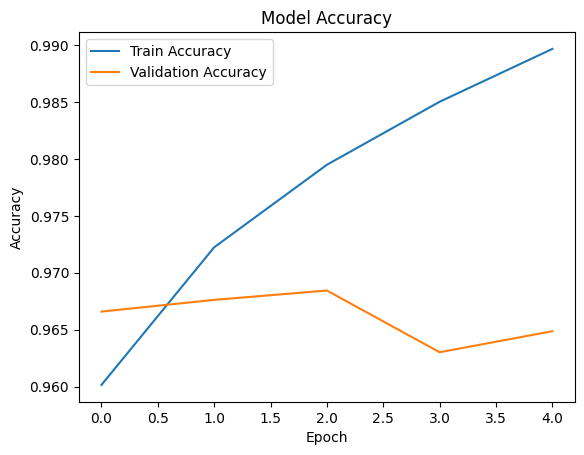

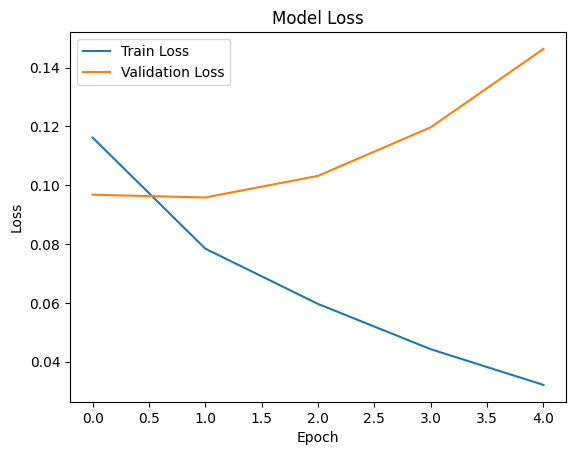

In [30]:
import matplotlib.pyplot as plt

# Accuracy grafiği
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss grafiği
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [31]:
import numpy as np

# Modelin olasılık tahminleri (0-1 arası)
y_pred_prob = model.predict(X_test)

# Olasılıkları 0 veya 1’e yuvarla (eşik 0.5)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)


1522/1522 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step


In [32]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Detaylı Sınıflandırma Raporu (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}")


Confusion Matrix:
[[ 1648   965]
 [  746 45341]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.63      0.66      2613
           1       0.98      0.98      0.98     46087

    accuracy                           0.96     48700
   macro avg       0.83      0.81      0.82     48700
weighted avg       0.96      0.96      0.96     48700


Accuracy: 0.9649


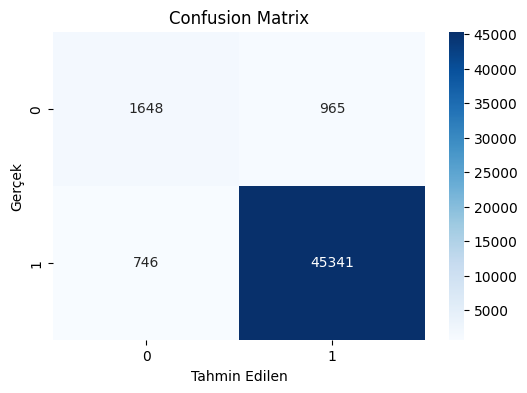

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()


In [34]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train)
class_weights = dict(enumerate(class_weights))
print(class_weights)

history = model.fit(X_train, y_train, epochs=5, batch_size=64,
                    validation_data=(X_test, y_test),
                    class_weight=class_weights)


{0: np.float64(8.803986260508), 1: np.float64(0.5301060228373627)}
Epoch 1/5
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 826s 271ms/step - accuracy: 0.9764 - loss: 0.0808 - val_accuracy: 0.9481 - val_loss: 0.1802
Epoch 2/5
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 838s 263ms/step - accuracy: 0.9862 - loss: 0.0505 - val_accuracy: 0.9488 - val_loss: 0.1990
Epoch 3/5
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 828s 272ms/step - accuracy: 0.9890 - loss: 0.0382 - val_accuracy: 0.9387 - val_loss: 0.2351
Epoch 4/5
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 866s 273ms/step - accuracy: 0.9905 - loss: 0.0326 - val_accuracy: 0.9308 - val_loss: 0.3016
Epoch 5/5
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 859s 272ms/step - accuracy: 0.9932 - loss: 0.0244 - val_accuracy: 0.9501 - val_loss: 0.2169


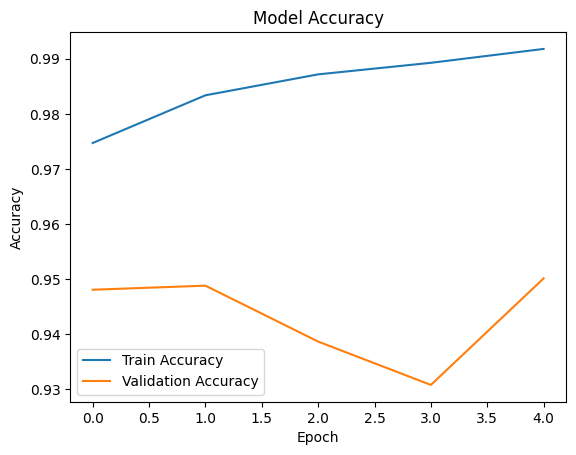

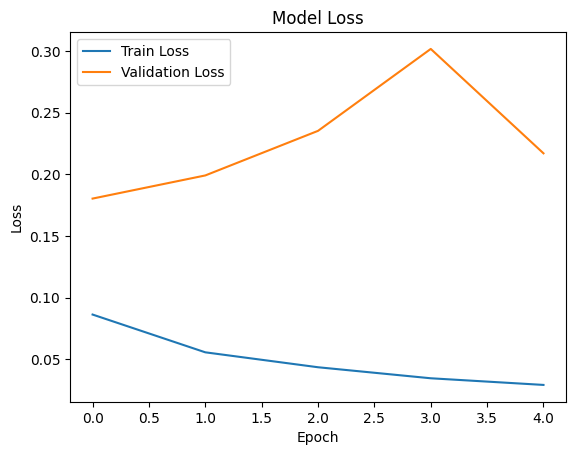

In [35]:
import matplotlib.pyplot as plt

# Accuracy grafiği
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss grafiği
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [36]:
import numpy as np

# Modelin olasılık tahminleri (0-1 arası)
y_pred_prob = model.predict(X_test)

# Olasılıkları 0 veya 1’e yuvarla (eşik 0.5)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

1522/1522 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step


In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Detaylı Sınıflandırma Raporu (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}")


Confusion Matrix:
[[ 1787   826]
 [ 1602 44485]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.68      0.60      2613
           1       0.98      0.97      0.97     46087

    accuracy                           0.95     48700
   macro avg       0.75      0.82      0.78     48700
weighted avg       0.96      0.95      0.95     48700


Accuracy: 0.9501


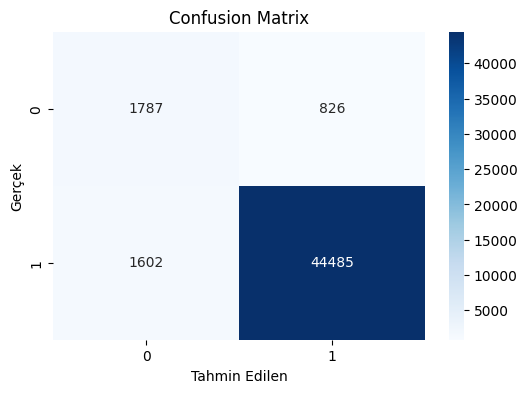

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()